# Clustering Crypto

In [62]:
# Initial imports
import pandas as pd
!pip install hvplot
!pip install bokeh
!pip install plotly

#!conda install -c pyviz hvplot
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=76ec09d5d65b4a9574d33038cfb10bc59e19f0081d72eb040ebe77bc527c8d89
  Stored in directory: c:\users\dlh\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


### Deliverable 1: Preprocessing the Data for PCA

In [69]:
# Load the crypto_data.csv dataset.
crypto_df = pd.read_csv('crypto_data.csv')
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [70]:
# Keep all the cryptocurrencies that are being traded.
# YOUR CODE HERE
crypto_df = crypto_df[crypto_df["IsTrading"]]
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [71]:
# Keep all the cryptocurrencies that have a working algorithm.
# YOUR CODE HERE
crypto_df = crypto_df[~crypto_df["Algorithm"].isnull()]
crypto_df.head()


,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [72]:
# Remove the "IsTrading" column. 
# YOUR CODE HERE
crypto_df = crypto_df.drop(columns="IsTrading")
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [73]:
# Remove rows that have at least 1 null value.
# YOUR CODE HERE
crypto_df = crypto_df.dropna(axis=0)
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [74]:
# Keep the rows where coins are mined.
# YOUR CODE HERE
crypto_df = crypto_df[crypto_df["TotalCoinsMined"] > 0]
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [75]:
# Create a new DataFrame that holds only the cryptocurrencies names.
# YOUR CODE HERE
crypto_names = crypto_df.iloc[:,0:2]
crypto_names.head()

,Unnamed: 0,CoinName
0,42,42 Coin
2,404,404Coin
5,1337,EliteCoin
7,BTC,Bitcoin
8,ETH,Ethereum


In [76]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
# YOUR CODE HERE
crypto_df = crypto_df.drop(columns="CoinName")
crypto_df.head()

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0


In [77]:
# Use get_dummies() to create variables for text features.
# YOUR CODE HERE
crypto_df_original = crypto_df
crypto_df = pd.get_dummies(data=crypto_df, columns = ["Algorithm", "ProofType"])
crypto_df.head()

,Unnamed: 0,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,42,4.199995e+01,42,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,404,1.055185e+09,532000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,ETH,1.076842e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
# Standardize the data with StandardScaler().
# YOUR CODE HERE
crypto_df = crypto_df.drop(columns = 'Unnamed: 0')
scaler = StandardScaler()
scaler.fit(crypto_df)
data = scaler.transform(crypto_df)
print(data)

[[-0.11710817 -0.1528703  -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.09396955 -0.145009   -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [ 0.52494561  4.48942416 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 ...
 [-0.09561336 -0.13217937 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11694817 -0.15255998 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11710536 -0.15285552 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]]


### Deliverable 2: Reducing Data Dimensions Using PCA

In [79]:
# Using PCA to reduce dimension to three principal components.
# YOUR CODE HERE
pca = PCA(n_components = 3)
pca.fit(data)
pca_data = pca.transform(data)
print(pca_data)

[[-0.34702848  0.9149739  -0.47702329]
 [-0.33037496  0.91504691 -0.47750877]
 [ 2.30247459  1.54374557 -0.60257761]
 ...
 [ 0.33206004 -2.23744292  0.36637251]
 [-0.13606124 -1.86585412  0.34076858]
 [-0.29716572  0.79731626 -0.23147921]]


In [80]:
# Create a DataFrame with the three principal components.
# YOUR CODE HERE
pca_df = pd.DataFrame(pca_data,index = crypto_names['Unnamed: 0'])
pca_df.head()

,0,1,2
Unnamed: 0,,,
42,-0.347028,0.914974,-0.477023
404,-0.330375,0.915047,-0.477509
1337,2.302475,1.543746,-0.602578
BTC,-0.140539,-1.296420,0.159639
ETH,-0.145121,-1.979320,0.335421


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

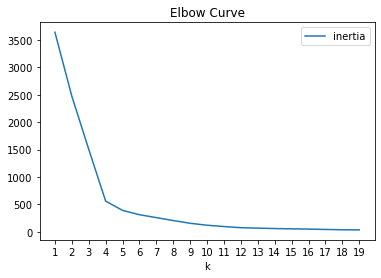

In [81]:
# Create an elbow curve to find the best value for K.
inertia = []
k = list(range(1, 20))
# Calculate the inertia for the range of K values
for i in k:
   km = KMeans(n_clusters=i, random_state=0)
   km.fit(pca_df)
   inertia.append(km.inertia_)

elbow_data = {'k': k, 'inertia':inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.plot(x='k', y='inertia', xticks = k, title="Elbow Curve")

Running K-Means with `k=4`

In [82]:
# Initialize the K-Means model.
km = KMeans(n_clusters=4, random_state=0)

# Fit the model
km.fit(pca_df)

# Predict clusters
clusters = km.predict(pca_df)

In [83]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = crypto_df_original # [{'Algorithm','ProofType','TotalCoinsMined,'TotalCoinSupply}]
clustered_df["PC1"] = pca_df[0].values
clustered_df["PC2"] = pca_df[1].values
clustered_df["PC3"] = pca_df[2].values

#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df["CoinName"] = crypto_names["CoinName"]

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df["Class"] = clusters

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(532, 10)


,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC1,PC2,PC3,CoinName,Class
0,42,Scrypt,PoW/PoS,4.199995e+01,42,-0.347028,0.914974,-0.477023,42 Coin,0
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.330375,0.915047,-0.477509,404Coin,0
5,1337,X13,PoW/PoS,2.927942e+10,314159265359,2.302475,1.543746,-0.602578,EliteCoin,0
7,BTC,SHA-256,PoW,1.792718e+07,21000000,-0.140539,-1.296420,0.159639,Bitcoin,1
8,ETH,Ethash,PoW,1.076842e+08,0,-0.145121,-1.979320,0.335421,Ethereum,1
9,LTC,Scrypt,PoW,6.303924e+07,84000000,-0.171785,-1.147141,0.024556,Litecoin,1
10,DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.395637,1.179661,-0.450046,Dash,0
11,XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.141761,-2.156266,0.376993,Monero,1
12,ETC,Ethash,PoW,1.133597e+08,210000000,-0.143564,-1.979426,0.335402,Ethereum Classic,1
13,ZEC,Equihash,PoW,7.383056e+06,21000000,-0.136060,-1.865854,0.340769,ZCash,1


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

In [84]:
# Creating a 3D-Scatter with the PCA data and the clusters

fig = px.scatter_3d(clustered_df, x = 'PC1', y = 'PC2', z = 'PC3',
                    color = 'Class', hover_name = 'CoinName', 
                    hover_data = ['Algorithm'])
fig.show()


In [89]:
# Create a table with tradable cryptocurrencies.
clustered_df.hvplot.table()
clustered_df.hvplot.table(columns=['Unnamed: 0', 'Algorithm', 'TotalCoinSupply'], sortable=True, selectable=True)
clustered_df

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC1,PC2,PC3,CoinName,Class
0,42,Scrypt,PoW/PoS,4.199995e+01,42,-0.347028,0.914974,-0.477023,42 Coin,0
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.330375,0.915047,-0.477509,404Coin,0
5,1337,X13,PoW/PoS,2.927942e+10,314159265359,2.302475,1.543746,-0.602578,EliteCoin,0
7,BTC,SHA-256,PoW,1.792718e+07,21000000,-0.140539,-1.296420,0.159639,Bitcoin,1
8,ETH,Ethash,PoW,1.076842e+08,0,-0.145121,-1.979320,0.335421,Ethereum,1
...,...,...,...,...,...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000,2.479584,0.890924,-0.297905,ZEPHYR,0
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000,-0.345075,0.914850,-0.477049,Gapcoin,0
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610,0.332060,-2.237443,0.366373,Beldex,1
1246,ZEN,Equihash,PoW,7.296538e+06,21000000,-0.136061,-1.865854,0.340769,Horizen,1


In [90]:
# Print the total number of tradable cryptocurrencies.
clustered_df.shape[0]

532

In [93]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
# YOUR CODE HERE
scaled = MinMaxScaler().fit_transform(clustered_df[["TotalCoinSupply","TotalCoinsMined"]])
print(scaled)

[[4.20000000e-11 0.00000000e+00]
 [5.32000000e-04 1.06585544e-03]
 [3.14159265e-01 2.95755135e-02]
 ...
 [1.40022261e-03 9.90135079e-04]
 [2.10000000e-05 7.37028150e-06]
 [1.00000000e-06 1.29582282e-07]]


In [100]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
# YOUR CODE HERE
scaled_df = pd.DataFrame(scaled, columns = {"TotalCoinSupply","TotalCoinsMined"}, index = 
                        clustered_df.index)

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
# YOUR CODE HERE
scaled_df["CoinName"] = clustered_df["CoinName"]

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
# YOUR CODE HERE
scaled_df["Class"] = clustered_df["Class"]
scaled_df.head()


,TotalCoinSupply,TotalCoinsMined,CoinName,Class
0,4.200000e-11,0.000000,42 Coin,0
2,5.320000e-04,0.001066,404Coin,0
5,3.141593e-01,0.029576,EliteCoin,0
7,2.100000e-05,0.000018,Bitcoin,1
8,0.000000e+00,0.000109,Ethereum,1


In [105]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
# YOUR CODE HERE
fig = px.scatter(scaled_df,x="TotalCoinsMined",y='TotalCoinSupply',hover_name="CoinName")
fig.show()